In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

DATA OUTLOOK

In [10]:
df = pd.read_csv("C:\\Users\\Nimish\\Downloads\\netflix_titles.csv")

In [11]:
df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
df.shape

(7787, 12)

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

CHECKING FOR NULL VALUES AND FILLING THEM


In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
df['director'] = df['director'].fillna('Director not specified')
df['cast'] = df['cast'].fillna('Cast not specified')
df['country'] = df['country'].fillna('Country not specified')
df['rating'] = df['rating'].fillna('Rating not specified')

**PARSE DATES**

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

#### Extract useful time features
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Director not specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0


INDIVIDUAL COLUMNS DETAILS


In [19]:
df["type"].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [20]:
df["rating"].value_counts()

rating
TV-MA                   2863
TV-14                   1931
TV-PG                    806
R                        665
PG-13                    386
TV-Y                     280
TV-Y7                    271
PG                       247
TV-G                     194
NR                        84
G                         39
Rating not specified       7
TV-Y7-FV                   6
UR                         5
NC-17                      3
Name: count, dtype: int64

In [21]:
###Range of years

print(df["release_year"].min(), "-", df["release_year"].max())

1925 - 2021


In [22]:
df["country"].value_counts()

country
United States                                                   2555
India                                                            923
Country not specified                                            507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

Distribution of content rating on netflix

In [23]:
x = df.groupby(["rating"]).size().reset_index(name = "counts")
piechart = px.pie(x,values = "counts", names="rating",title = "Distribution of content rating on netflix")
piechart.show()

RELATION BETWEEN VARIABLES

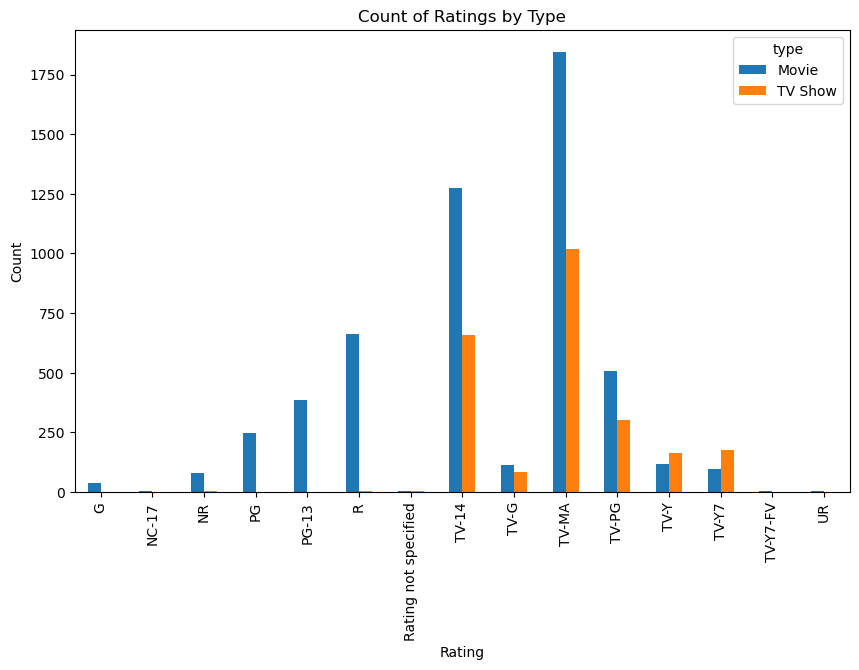

In [24]:
type_rating_counts = pd.crosstab(df['rating'], df['type'])
type_rating_counts.plot(kind='bar', figsize=(10,6))
plt.title('Count of Ratings by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

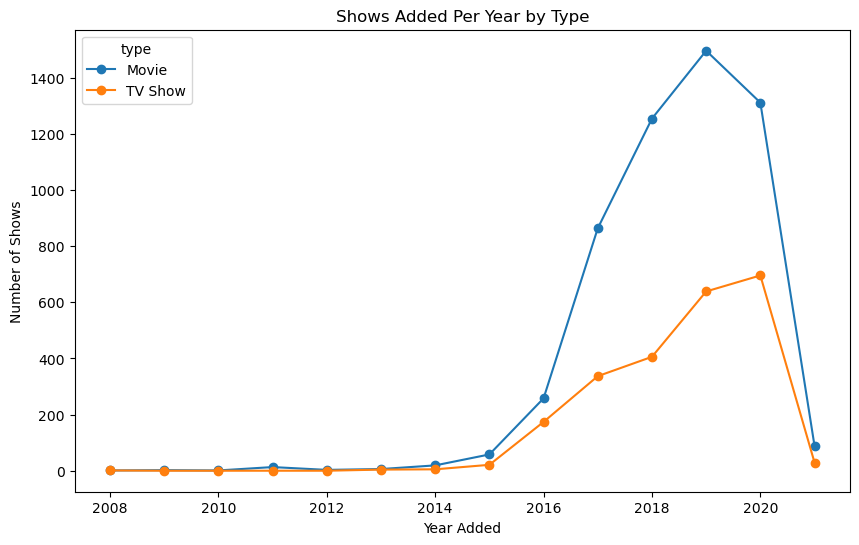

In [25]:
df_clean = df.dropna(subset=['date_added'])

# Count of shows by type per year
type_year_counts = pd.crosstab(df_clean['year_added'], df_clean['type'])
type_year_counts.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Shows Added Per Year by Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows')
plt.show()

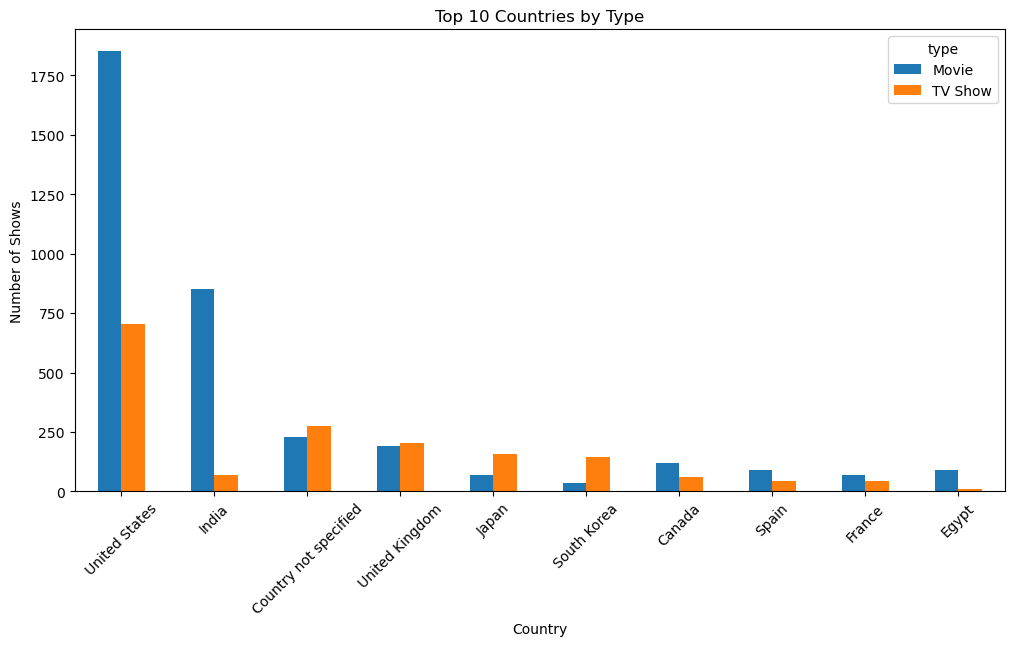

In [26]:
country_type_counts = pd.crosstab(df['country'], df['type'])

# Top 10 countries by total shows
top_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(10).index
country_type_counts.loc[top_countries].plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Countries by Type')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

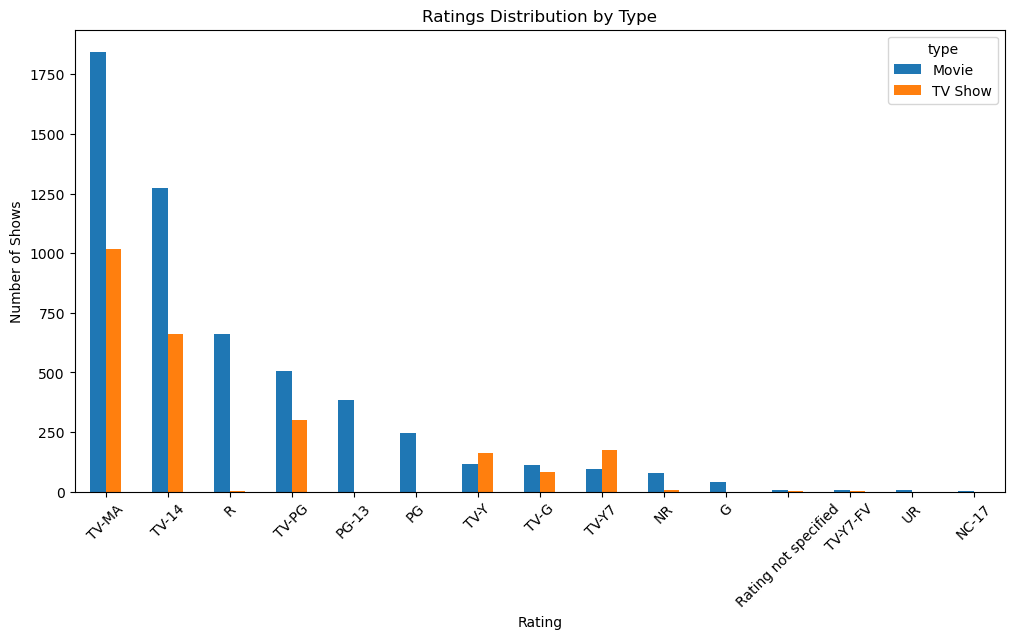

In [27]:
rating_type_counts = pd.crosstab(df['rating'], df['type']).sort_values(by='Movie', ascending=False)

# Plot
rating_type_counts.plot(kind='bar', figsize=(12,6))
plt.title('Ratings Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Split by comma, stack, clean, and convert to DataFrame
directors_df = df['director'].str.split(',', expand=True).stack().str.strip().to_frame()
directors_df.columns = ['Director']

# Group by director and count
directors = directors_df.groupby(['Director']).size().reset_index(name='Total Count')

# Remove placeholder
directors = directors[directors['Director'] != 'Director not specified']

# Sort values
directors = directors.sort_values(by='Total Count', ascending=False)

# Display top 10
print(directors.head(5))

top5Directors = directors.head(5)
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart1 = px.bar(top5Directors, x='Total Count', y='Director', title='Top 5 Directors on Netflix')
barChart1.show()

                 Director  Total Count
1721            Jan Suter           21
3409          Raúl Campos           19
2579         Marcus Raboy           16
1764            Jay Karas           15
688   Cathy Garcia-Molina           13


In [29]:
cast_df = df['cast'].str.split(',', expand=True).stack().str.strip().to_frame()
cast_df.columns = ['Cast']

# Group by cast member and count
cast = cast_df.groupby(['Cast']).size().reset_index(name='Total Count')

# Remove placeholder
cast = cast[cast['Cast'] != 'Cast not specified']

# Sort values
cast = cast.sort_values(by='Total Count', ascending=False)

# Display top 10
print(cast.head(5))

top5Actors = cast.head(5)
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Cast', title='Top 5 Actors on Netflix')
barChart2.show()

                   Cast  Total Count
2530        Anupam Kher           42
27503    Shah Rukh Khan           35
21815  Naseeruddin Shah           30
22900           Om Puri           30
751        Akshay Kumar           29


In [30]:
country_df = df['country'].str.split(',', expand=True).stack().str.strip().to_frame()
country_df.columns = ['Country']

# Group by country and count
country = country_df.groupby(['Country']).size().reset_index(name='Total Count')

# Remove placeholder
country = country[country['Country'] != 'Country not specified']

# Sort values
country = country.sort_values(by='Total Count', ascending=False)

# Display top 10
print(country.head(5))

top5Countries = country.head(5)
top5Countries = top5Countries.sort_values(by=['Total Count'])
barChart3 = px.bar(top5Countries, x='Total Count', y='Country', title='Top 5 Countries on Netflix')
barChart3.show()

            Country  Total Count
112   United States         3297
44            India          990
111  United Kingdom          723
19           Canada          412
35           France          349


In [31]:
df['director'] = df['director'].fillna('Unknown')

# Split multiple directors and explode
df_directors = df.assign(director=df['director'].str.split(',')).explode('director')

# Strip extra spaces
df_directors['director'] = df_directors['director'].str.strip()

# Remove 'Unknown' directors
df_directors = df_directors[df_directors['director'] != 'Director not specified']

# Count number of movies and TV shows per director
director_type_counts = pd.crosstab(df_directors['director'], df_directors['type'])

# Select top 10 directors by total number of shows
top_directors = director_type_counts.sum(axis=1).sort_values(ascending=False).head(10).index
top_director_type_counts = director_type_counts.loc[top_directors]

# Reset index for plotting
top_director_type_counts = top_director_type_counts.reset_index()

# Plot stacked bar chart
fig = px.bar(top_director_type_counts,
             x='director',
             y=['Movie', 'TV Show'],
             title='Top 10 Directors by Number of Movies and TV Shows',
             labels={'value':'Number of Shows','director':'Director'},
             text_auto=True)

fig.show()

In [34]:
# Replace df_clean with your actual cleaned dataframe variable name
df_clean.to_csv(r"C:\\Users\\Nimish\\Downloads\\cleaned_netflix_titles.csv", index=False)


print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!
